<a href="https://colab.research.google.com/github/karen1203/Extracci-n-de-caracter-sticas/blob/main/Act5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%pip install funpymodeling

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from funpymodeling.exploratory import freq_tbl

In [11]:
micro=pd.read_excel('micro.xlsx')
micro.info()
micro

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),19.042794,-98.193802,Miscelánea rubí,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Primero seleccionamos las 20 variables que vamos a ocupar para el análisis.

In [12]:
micro=micro[['does_the_micro_retailer_sells_fresh_products_','type_of_store','does_the_micro_retailer_exhibits_products_outside_','store_devices','how_many_shelves_does_the_micro_retailer_have','current_permanent_employees','inventory_records','sales_records','sales_channels','payment_methods','sales_planning_tools','services','credit_to_customers','number_direct_competitors','home_deliveries','reception_delivery_packages','place_orders_suppliers','willingness_inventory_management_suppliers','internet_connection','technology_investment_customer_preferences']]
micro

,does_the_micro_retailer_sells_fresh_products_,type_of_store,does_the_micro_retailer_exhibits_products_outside_,store_devices,how_many_shelves_does_the_micro_retailer_have,current_permanent_employees,inventory_records,sales_records,sales_channels,payment_methods,sales_planning_tools,services,credit_to_customers,number_direct_competitors,home_deliveries,reception_delivery_packages,place_orders_suppliers,willingness_inventory_management_suppliers,internet_connection,technology_investment_customer_preferences
0,no,Tailor,no,POS system (i.e. computer + bar code scanner +...,4,2.0,Software especializado + computadora,Software especializado + computadora,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Software especializado,NaN,no,3.0,NaN,NaN,NaN,NaN,yes,NaN
1,yes,Grocery store (aka. nanostore),yes,Dataphone (i.e. card payments),8,1.0,No lo hago,No lo hago,WhatsApp,"Efectivo,Transferencia interbancaria",NaN,NaN,no,4.0,NaN,NaN,NaN,NaN,yes,NaN
2,no,Grocery store (aka. nanostore),no,"Dataphone (i.e. card payments),POS system (i.e...",24,2.0,En Excel,Software especializado + computadora,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",NaN,NaN,yes,0.0,NaN,NaN,NaN,NaN,yes,NaN
3,no,Grocery store (aka. nanostore),no,POS system (i.e. computer + bar code scanner +...,2,1.0,Software especializado + computadora,Software especializado + computadora,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Ninguna,NaN,no,4.0,NaN,NaN,NaN,NaN,yes,NaN
4,no,Grocery store (aka. nanostore),no,Smartphone,16,0.0,En papel,En papel,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",NaN,NaN,yes,0.0,NaN,NaN,NaN,NaN,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,no,Grocery store (aka. nanostore),no,"Analog cash register,Smartphone",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,no,Grocery store (aka. nanostore),no,"Analog cash register,Smartphone",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,yes,Micro-restaurant (aka. fondita),no,Smartphone,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,yes,Micro-restaurant (aka. fondita),no,Analog cash register,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
micro.isnull().sum()

does_the_micro_retailer_sells_fresh_products_           0
type_of_store                                           0
does_the_micro_retailer_exhibits_products_outside_      0
store_devices                                           2
how_many_shelves_does_the_micro_retailer_have           0
current_permanent_employees                            60
inventory_records                                      61
sales_records                                          61
sales_channels                                         89
payment_methods                                        64
sales_planning_tools                                   89
services                                               94
credit_to_customers                                    64
number_direct_competitors                              68
home_deliveries                                       113
reception_delivery_packages                           103
place_orders_suppliers                                100
willingness_in

In [14]:
micro.groupby(['store_devices'])['store_devices'].count()

store_devices
Analog cash register                                                                                                                       16
Analog cash register,Dataphone (i.e. card payments)                                                                                         2
Analog cash register,Dataphone (i.e. card payments),POS system (i.e. computer + bar code scanner + printer)                                 1
Analog cash register,Dataphone (i.e. card payments),POS system (i.e. computer + bar code scanner + printer),Security cameras,Smartphone     1
Analog cash register,Dataphone (i.e. card payments),Security cameras                                                                        2
Analog cash register,Dataphone (i.e. card payments),Security cameras,Smartphone                                                             2
Analog cash register,Dataphone (i.e. card payments),Smartphone                                                                        

In [15]:
micro['store_devices']=micro['store_devices'].fillna('Smartphone')


<ipython-input-15-2aa5dec12fed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['store_devices']=micro['store_devices'].fillna('Smartphone')


In [16]:
micro.isnull().sum()

does_the_micro_retailer_sells_fresh_products_           0
type_of_store                                           0
does_the_micro_retailer_exhibits_products_outside_      0
store_devices                                           0
how_many_shelves_does_the_micro_retailer_have           0
current_permanent_employees                            60
inventory_records                                      61
sales_records                                          61
sales_channels                                         89
payment_methods                                        64
sales_planning_tools                                   89
services                                               94
credit_to_customers                                    64
number_direct_competitors                              68
home_deliveries                                       113
reception_delivery_packages                           103
place_orders_suppliers                                100
willingness_in

In [17]:
micro.groupby(['current_permanent_employees'])['current_permanent_employees'].count()

current_permanent_employees
0.0     26
1.0     33
2.0     26
3.0     11
4.0     10
5.0      3
6.0      1
50.0     1
Name: current_permanent_employees, dtype: int64

In [18]:
micro['current_permanent_employees']=micro['current_permanent_employees'].fillna(1.0)

<ipython-input-18-a76b67ee9639>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['current_permanent_employees']=micro['current_permanent_employees'].fillna(1.0)


In [19]:
micro.groupby(['inventory_records'])['inventory_records'].count()

inventory_records
Aplicación móvil (i.e. App) + smartphone              1
Aplicación móvil (i.e. App) + smartphone,En Excel     1
En Excel                                             20
En Excel,En papel                                     7
En papel                                             40
En papel,Mental                                       1
Mentalmente                                           1
No lo hago                                           18
Software especializado + computadora                 21
Name: inventory_records, dtype: int64

In [20]:
micro['inventory_records']=micro['inventory_records'].fillna('En papel')

<ipython-input-20-7f82bf7f30f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['inventory_records']=micro['inventory_records'].fillna('En papel')


In [21]:
micro.groupby(['sales_records'])['sales_records'].count()

sales_records
Aplicación móvil (i.e. App) + smartphone                                                                      1
Aplicación móvil (i.e. App) + smartphone,Caja registradora (análoga)                                          1
Aplicación móvil (i.e. App) + smartphone,Caja registradora (análoga),Software especializado + computadora     1
Aplicación móvil (i.e. App) + smartphone,En Excel,En papel                                                    1
Aplicación móvil (i.e. App) + smartphone,Software especializado + computadora                                 1
Caja registradora (análoga)                                                                                   4
Caja registradora (análoga),En Excel,En papel                                                                 1
Contadora                                                                                                     1
En Excel                                                                                  

In [22]:
micro['sales_records']=micro['sales_records'].fillna('En papel')

<ipython-input-22-10765dc63288>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['sales_records']=micro['sales_records'].fillna('En papel')


In [23]:
micro.isnull().sum()

does_the_micro_retailer_sells_fresh_products_           0
type_of_store                                           0
does_the_micro_retailer_exhibits_products_outside_      0
store_devices                                           0
how_many_shelves_does_the_micro_retailer_have           0
current_permanent_employees                             0
inventory_records                                       0
sales_records                                           0
sales_channels                                         89
payment_methods                                        64
sales_planning_tools                                   89
services                                               94
credit_to_customers                                    64
number_direct_competitors                              68
home_deliveries                                       113
reception_delivery_packages                           103
place_orders_suppliers                                100
willingness_in

In [24]:
micro.groupby(['sales_channels'])['sales_channels'].count()

sales_channels
Aplicación móvil (e.g. Rappi, Uber Eats)                                                                                                  2
Aplicación móvil (e.g. Rappi, Uber Eats),Llamada a Teléfono celular,Llamada a Teléfono fijo,Redes sociales (e.g. Facebook, Instagram)     1
Aplicación móvil (e.g. Rappi, Uber Eats),Llamada a Teléfono celular,Redes sociales (e.g. Facebook, Instagram),WhatsApp                    1
Aplicación móvil (e.g. Rappi, Uber Eats),Llamada a Teléfono fijo,Redes sociales (e.g. Facebook, Instagram),WhatsApp                       1
Físico                                                                                                                                    1
Llamada a Teléfono celular                                                                                                                5
Llamada a Teléfono celular,Llamada a Teléfono fijo,Página web propia,Redes sociales (e.g. Facebook, Instagram),WhatsApp                   1
Llama

In [25]:
micro['sales_channels']=micro['sales_channels'].fillna('Redes sociales (e.g. Facebook, Instagram)')

<ipython-input-25-52ae6a9c5772>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['sales_channels']=micro['sales_channels'].fillna('Redes sociales (e.g. Facebook, Instagram)')


In [26]:
micro.groupby(['payment_methods'])['payment_methods'].count()

payment_methods
Aplicación móvil (e.g. CODI),Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria                                           1
Aplicación móvil (e.g. CODI),Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria,Trueque (e.g. comercio o intercambio)     1
Efectivo                                                                                                                                 40
Efectivo,Tarjeta de débito y/o crédito                                                                                                   19
Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria                                                                       30
Efectivo,Transferencia interbancaria                                                                                                     15
Tarjeta de débito y/o crédito                                                                                                             1
Name

In [27]:
micro['payment_methods']=micro['payment_methods'].fillna('Efectivo')

<ipython-input-27-a8af958d0a63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['payment_methods']=micro['payment_methods'].fillna('Efectivo')


In [28]:
micro.groupby(['sales_planning_tools'])['sales_planning_tools'].count()

sales_planning_tools
Aplicación móvil                            1
Aplicación móvil,Excel                      1
Aplicación móvil,Software especializado     1
Catálogo                                    1
Cuaderno                                   21
Cuaderno,Excel                              3
Cuaderno,Ninguna                            2
En físico                                   1
Excel                                       6
Excel,Software especializado                1
Mental                                      1
Ninguna                                    33
Other                                       1
Por temporada de pan                        1
Redes sociales                              1
Sobre demanda                               1
Software especializado                      6
Name: sales_planning_tools, dtype: int64

In [29]:
micro['sales_planning_tools']=micro['sales_planning_tools'].fillna('Ninguna')

<ipython-input-29-d6dceb395091>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['sales_planning_tools']=micro['sales_planning_tools'].fillna('Ninguna')


In [30]:
micro.isnull().sum()

does_the_micro_retailer_sells_fresh_products_           0
type_of_store                                           0
does_the_micro_retailer_exhibits_products_outside_      0
store_devices                                           0
how_many_shelves_does_the_micro_retailer_have           0
current_permanent_employees                             0
inventory_records                                       0
sales_records                                           0
sales_channels                                          0
payment_methods                                         0
sales_planning_tools                                    0
services                                               94
credit_to_customers                                    64
number_direct_competitors                              68
home_deliveries                                       113
reception_delivery_packages                           103
place_orders_suppliers                                100
willingness_in

In [31]:
micro.groupby(['services'])['services'].count()

services
Entrega a domicilio                                                                                                                             15
Entrega a domicilio,Pago de servicios públicos (e.g. Yastas),Recarga telefónica                                                                  2
Entrega a domicilio,Pago de servicios públicos (e.g. Yastas),Recarga telefónica,Recepción y entrega de paquetes (e.g. Amazon, Mercado Libre)     1
Entrega a domicilio,Recarga telefónica                                                                                                           2
Entrega a domicilio,Recarga telefónica,Recepción y entrega de paquetes (e.g. Amazon, Mercado Libre)                                              1
Ninguno                                                                                                                                         44
Pago de servicios públicos (e.g. Yastas),Recarga telefónica                                                  

In [32]:
micro['services']=micro['services'].fillna('Ninguno')

<ipython-input-32-a82f8d885a1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['services']=micro['services'].fillna('Ninguno')


In [33]:
micro.groupby(['credit_to_customers'])['credit_to_customers'].count()

credit_to_customers
no     80
yes    27
Name: credit_to_customers, dtype: int64

In [34]:
micro['credit_to_customers']=micro['credit_to_customers'].fillna('no')

<ipython-input-34-a134b8cc7f17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['credit_to_customers']=micro['credit_to_customers'].fillna('no')


In [35]:
micro.groupby(['number_direct_competitors'])['number_direct_competitors'].count()

number_direct_competitors
0.0     12
1.0     16
2.0     16
3.0     16
4.0     14
5.0      8
6.0      6
7.0      5
8.0      3
10.0     3
15.0     2
20.0     2
Name: number_direct_competitors, dtype: int64

En este paso como la moda son tres valores, ocupé la media de esos tres, es decir 2.0, para que no tenga tanto impacto en la distribución de estos.


In [36]:
micro['number_direct_competitors']=micro['number_direct_competitors'].fillna(2.0)

<ipython-input-36-576958ae1673>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['number_direct_competitors']=micro['number_direct_competitors'].fillna(2.0)


In [37]:
micro.groupby(['home_deliveries'])['home_deliveries'].count()

home_deliveries
Algo de acuerdo                   11
Algo en desacuerdo                 5
Ni de acuerdo ni en desacuerdo     3
Totalmente de acuerdo             14
Totalmente en desacuerdo          25
Name: home_deliveries, dtype: int64

In [38]:
micro['home_deliveries']=micro['home_deliveries'].fillna('Totalmente en desacuerdo')

<ipython-input-38-d86d4cbf0d68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['home_deliveries']=micro['home_deliveries'].fillna('Totalmente en desacuerdo')


In [39]:
micro.isnull().sum()

does_the_micro_retailer_sells_fresh_products_           0
type_of_store                                           0
does_the_micro_retailer_exhibits_products_outside_      0
store_devices                                           0
how_many_shelves_does_the_micro_retailer_have           0
current_permanent_employees                             0
inventory_records                                       0
sales_records                                           0
sales_channels                                          0
payment_methods                                         0
sales_planning_tools                                    0
services                                                0
credit_to_customers                                     0
number_direct_competitors                               0
home_deliveries                                         0
reception_delivery_packages                           103
place_orders_suppliers                                100
willingness_in

In [40]:
micro.groupby(['reception_delivery_packages'])['reception_delivery_packages'].count()

reception_delivery_packages
Algo de acuerdo                    9
Algo en desacuerdo                 2
Ni de acuerdo ni en desacuerdo     3
Totalmente de acuerdo              8
Totalmente en desacuerdo          46
Name: reception_delivery_packages, dtype: int64

In [41]:
micro['reception_delivery_packages']=micro['reception_delivery_packages'].fillna('Totalmente en desacuerdo')

<ipython-input-41-32b1f2f3f3d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['reception_delivery_packages']=micro['reception_delivery_packages'].fillna('Totalmente en desacuerdo')


In [42]:
micro.groupby(['place_orders_suppliers'])['place_orders_suppliers'].count()

place_orders_suppliers
Compra directa                                                                 1
Email,En persona                                                               1
Email,Mensajería instantánea (e.g. WhatsApp)                                   1
En persona                                                                    20
En persona,Llamada telefónica                                                  5
En persona,Llamada telefónica,Mensajería instantánea (e.g. WhatsApp)           7
En persona,Mensaje de texto (SMS)                                              1
En persona,Mensajería instantánea (e.g. WhatsApp)                              5
En persona,Mensajería instantánea (e.g. WhatsApp),Página web del proveedor     1
En persona,Página web del proveedor                                            2
Llamada telefónica                                                             6
Llamada telefónica,Mensaje de texto (SMS)                                      1
Llama

In [43]:
micro['place_orders_suppliers']=micro['place_orders_suppliers'].fillna('En persona')

<ipython-input-43-d1507881bf80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['place_orders_suppliers']=micro['place_orders_suppliers'].fillna('En persona')


In [44]:
micro.groupby(['willingness_inventory_management_suppliers'])['willingness_inventory_management_suppliers'].count()

willingness_inventory_management_suppliers
Algo de acuerdo                    5
Algo en desacuerdo                 8
Ni de acuerdo ni en desacuerdo     5
Totalmente de acuerdo              3
Totalmente en desacuerdo          58
Name: willingness_inventory_management_suppliers, dtype: int64

In [45]:
micro['willingness_inventory_management_suppliers']=micro['willingness_inventory_management_suppliers'].fillna('Totalmente en desacuerdo')

<ipython-input-45-43255e2c1c0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['willingness_inventory_management_suppliers']=micro['willingness_inventory_management_suppliers'].fillna('Totalmente en desacuerdo')


In [46]:
micro.groupby(['internet_connection'])['internet_connection'].count()

internet_connection
no     32
yes    76
Name: internet_connection, dtype: int64

In [47]:
micro['internet_connection']=micro['internet_connection'].fillna('yes')

<ipython-input-47-0cd66ab97dea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['internet_connection']=micro['internet_connection'].fillna('yes')


In [48]:
micro.groupby(['technology_investment_customer_preferences'])['technology_investment_customer_preferences'].count()

technology_investment_customer_preferences
De acuerdo                        24
En desacuerdo                      2
Ni de acuerdo ni en desacuerdo     2
Totalmente de acuerdo             29
Totalmente en desacuerdo          13
Name: technology_investment_customer_preferences, dtype: int64

In [49]:
micro['technology_investment_customer_preferences']=micro['technology_investment_customer_preferences'].fillna('Totalmente en desacuerdo')

<ipython-input-49-8f40cf4f2f73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro['technology_investment_customer_preferences']=micro['technology_investment_customer_preferences'].fillna('Totalmente en desacuerdo')


In [50]:
micro.isnull().sum()

does_the_micro_retailer_sells_fresh_products_         0
type_of_store                                         0
does_the_micro_retailer_exhibits_products_outside_    0
store_devices                                         0
how_many_shelves_does_the_micro_retailer_have         0
current_permanent_employees                           0
inventory_records                                     0
sales_records                                         0
sales_channels                                        0
payment_methods                                       0
sales_planning_tools                                  0
services                                              0
credit_to_customers                                   0
number_direct_competitors                             0
home_deliveries                                       0
reception_delivery_packages                           0
place_orders_suppliers                                0
willingness_inventory_management_suppliers      

In [51]:
micro

,does_the_micro_retailer_sells_fresh_products_,type_of_store,does_the_micro_retailer_exhibits_products_outside_,store_devices,how_many_shelves_does_the_micro_retailer_have,current_permanent_employees,inventory_records,sales_records,sales_channels,payment_methods,sales_planning_tools,services,credit_to_customers,number_direct_competitors,home_deliveries,reception_delivery_packages,place_orders_suppliers,willingness_inventory_management_suppliers,internet_connection,technology_investment_customer_preferences
0,no,Tailor,no,POS system (i.e. computer + bar code scanner +...,4,2.0,Software especializado + computadora,Software especializado + computadora,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Software especializado,Ninguno,no,3.0,Totalmente en desacuerdo,Totalmente en desacuerdo,En persona,Totalmente en desacuerdo,yes,Totalmente en desacuerdo
1,yes,Grocery store (aka. nanostore),yes,Dataphone (i.e. card payments),8,1.0,No lo hago,No lo hago,WhatsApp,"Efectivo,Transferencia interbancaria",Ninguna,Ninguno,no,4.0,Totalmente en desacuerdo,Totalmente en desacuerdo,En persona,Totalmente en desacuerdo,yes,Totalmente en desacuerdo
2,no,Grocery store (aka. nanostore),no,"Dataphone (i.e. card payments),POS system (i.e...",24,2.0,En Excel,Software especializado + computadora,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Ninguna,Ninguno,yes,0.0,Totalmente en desacuerdo,Totalmente en desacuerdo,En persona,Totalmente en desacuerdo,yes,Totalmente en desacuerdo
3,no,Grocery store (aka. nanostore),no,POS system (i.e. computer + bar code scanner +...,2,1.0,Software especializado + computadora,Software especializado + computadora,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Ninguna,Ninguno,no,4.0,Totalmente en desacuerdo,Totalmente en desacuerdo,En persona,Totalmente en desacuerdo,yes,Totalmente en desacuerdo
4,no,Grocery store (aka. nanostore),no,Smartphone,16,0.0,En papel,En papel,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Ninguna,Ninguno,yes,0.0,Totalmente en desacuerdo,Totalmente en desacuerdo,En persona,Totalmente en desacuerdo,yes,Totalmente en desacuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,no,Grocery store (aka. nanostore),no,"Analog cash register,Smartphone",5,1.0,En papel,En papel,"Redes sociales (e.g. Facebook, Instagram)",Efectivo,Ninguna,Ninguno,no,2.0,Totalmente en desacuerdo,Totalmente en desacuerdo,En persona,Totalmente en desacuerdo,yes,Totalmente en desacuerdo
167,no,Grocery store (aka. nanostore),no,"Analog cash register,Smartphone",5,1.0,En papel,En papel,"Redes sociales (e.g. Facebook, Instagram)",Efectivo,Ninguna,Ninguno,no,2.0,Totalmente en desacuerdo,Totalmente en desacuerdo,En persona,Totalmente en desacuerdo,yes,Totalmente en desacuerdo
168,yes,Micro-restaurant (aka. fondita),no,Smartphone,1,1.0,En papel,En papel,"Redes sociales (e.g. Facebook, Instagram)",Efectivo,Ninguna,Ninguno,no,2.0,Totalmente en desacuerdo,Totalmente en desacuerdo,En persona,Totalmente en desacuerdo,yes,Totalmente en desacuerdo
169,yes,Micro-restaurant (aka. fondita),no,Analog cash register,1,1.0,En papel,En papel,"Redes sociales (e.g. Facebook, Instagram)",Efectivo,Ninguna,Ninguno,no,2.0,Totalmente en desacuerdo,Totalmente en desacuerdo,En persona,Totalmente en desacuerdo,yes,Totalmente en desacuerdo


In [52]:
microcuali=micro[['does_the_micro_retailer_sells_fresh_products_','type_of_store','does_the_micro_retailer_exhibits_products_outside_','store_devices','inventory_records','sales_records','sales_channels','payment_methods','sales_planning_tools','services','credit_to_customers','home_deliveries','reception_delivery_packages','place_orders_suppliers','willingness_inventory_management_suppliers','internet_connection','technology_investment_customer_preferences']]

In [53]:
microcuanti=micro[['how_many_shelves_does_the_micro_retailer_have','current_permanent_employees','number_direct_competitors']]
microcuanti

,how_many_shelves_does_the_micro_retailer_have,current_permanent_employees,number_direct_competitors
0,4,2.0,3.0
1,8,1.0,4.0
2,24,2.0,0.0
3,2,1.0,4.0
4,16,0.0,0.0
...,...,...,...
166,5,1.0,2.0
167,5,1.0,2.0
168,1,1.0,2.0
169,1,1.0,2.0


Graficamos las variables cuantitativas para ver los outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7ef827648d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7ef8276490f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ef82760fe20>,
 'medians': [<matplotlib.lines.Line2D at 0x7ef827648790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ef827693f70>,
 'means': []}

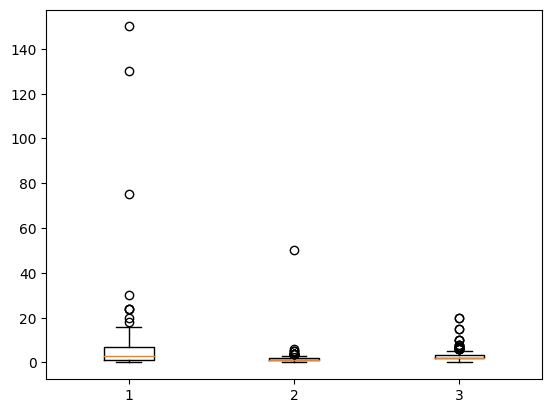

In [54]:
plt.boxplot(microcuanti)

A continuación ajustaré los outliers con ayuda del rango intercuartílico, para que los valores que estén fuera del rango se ajuste al valor máximo en este caso que esté dentro de los parámetros aceptables de acuerdo al método de rango intercuartílico.

In [55]:
q1 = microcuanti['how_many_shelves_does_the_micro_retailer_have'].quantile(0.25)
q3 = microcuanti['how_many_shelves_does_the_micro_retailer_have'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_df = microcuanti[(microcuanti['how_many_shelves_does_the_micro_retailer_have'] >= lower_bound) & (microcuanti['how_many_shelves_does_the_micro_retailer_have'] <= upper_bound)]


In [56]:

microcuanti['how_many_shelves_does_the_micro_retailer_have'] = np.where(microcuanti['how_many_shelves_does_the_micro_retailer_have'] > upper_bound, upper_bound, microcuanti['how_many_shelves_does_the_micro_retailer_have'])

microcuanti['how_many_shelves_does_the_micro_retailer_have'] = np.where(microcuanti['how_many_shelves_does_the_micro_retailer_have'] < lower_bound, lower_bound, microcuanti['how_many_shelves_does_the_micro_retailer_have'])


<ipython-input-56-830a050af7d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microcuanti['how_many_shelves_does_the_micro_retailer_have'] = np.where(microcuanti['how_many_shelves_does_the_micro_retailer_have'] > upper_bound, upper_bound, microcuanti['how_many_shelves_does_the_micro_retailer_have'])
<ipython-input-56-830a050af7d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microcuanti['how_many_shelves_does_the_micro_retailer_have'] = np.where(microcuanti['how_many_shelves_does_the_micro_retailer_h

Después haremos lo mismo con las otras dos variables, dado que son números enteros se tienen que ajustar para que queden números enteros y ajustados a los parámetros.

In [57]:
q11 = microcuanti['current_permanent_employees'].quantile(0.25)
q31 = microcuanti['current_permanent_employees'].quantile(0.75)
iqr1 = q31 - q11

lower_bound1 = q11 - 1.5 * iqr1
upper_bound1 = q31 + 1.5 * iqr1
filtered_df1 = microcuanti[(microcuanti['current_permanent_employees'] >= lower_bound1) & (microcuanti['current_permanent_employees'] <= upper_bound1)]


In [58]:
microcuanti['current_permanent_employees'] = np.where(microcuanti['current_permanent_employees'] > upper_bound1, upper_bound1, microcuanti['current_permanent_employees'])

microcuanti['current_permanent_employees'] = np.where(microcuanti['current_permanent_employees'] < lower_bound1, lower_bound1, microcuanti['current_permanent_employees'])


<ipython-input-58-093928c1972d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microcuanti['current_permanent_employees'] = np.where(microcuanti['current_permanent_employees'] > upper_bound1, upper_bound1, microcuanti['current_permanent_employees'])
<ipython-input-58-093928c1972d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microcuanti['current_permanent_employees'] = np.where(microcuanti['current_permanent_employees'] < lower_bound1, lower_bound1, microcuanti['current_permanent_employees'])


In [59]:
q12 = microcuanti['number_direct_competitors'].quantile(0.25)
q32 = microcuanti['number_direct_competitors'].quantile(0.75)
iqr2 = q32 - q12

lower_bound2 = q12 - 1.5 * iqr2
upper_bound2 = q32 + 1.5 * iqr2
filtered_df2 = microcuanti[(microcuanti['number_direct_competitors'] >= lower_bound2) & (microcuanti['number_direct_competitors'] <= upper_bound2)]

In [60]:
microcuanti['number_direct_competitors'] = np.where(microcuanti['number_direct_competitors'] > upper_bound2, upper_bound2, microcuanti['number_direct_competitors'])

microcuanti['number_direct_competitors'] = np.where(microcuanti['number_direct_competitors'] < lower_bound2, lower_bound2, microcuanti['number_direct_competitors'])


<ipython-input-60-b3a92be80542>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microcuanti['number_direct_competitors'] = np.where(microcuanti['number_direct_competitors'] > upper_bound2, upper_bound2, microcuanti['number_direct_competitors'])
<ipython-input-60-b3a92be80542>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microcuanti['number_direct_competitors'] = np.where(microcuanti['number_direct_competitors'] < lower_bound2, lower_bound2, microcuanti['number_direct_competitors'])


Aquí volvemos a unir las variables cuantitativas y cualitativas para poder poder analizar mejor

In [61]:
limpia=pd.concat([microcuanti,microcuali], axis=1)

In [85]:
t1=freq_tbl(limpia['does_the_micro_retailer_sells_fresh_products_'])
t1

,does_the_micro_retailer_sells_fresh_products_,frequency,percentage,cumulative_perc
0,no,105,0.614035,0.614035
1,yes,66,0.385965,1.000000


<Axes: ylabel='frequency'>

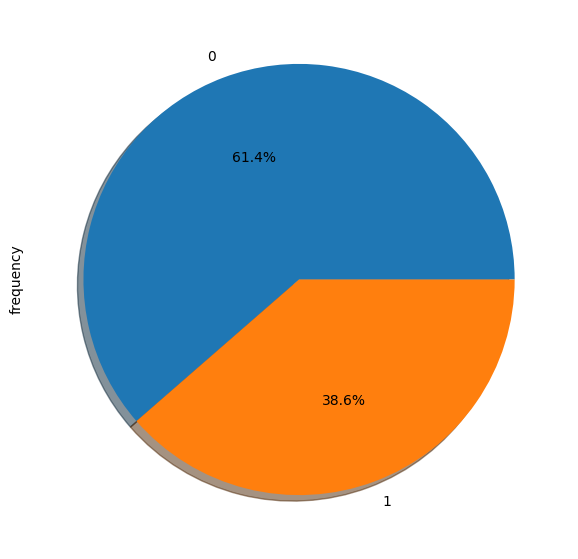

In [86]:
t1['frequency'].plot(kind='pie', figsize=(14,7),shadow=True, autopct="%0.1f%%")

In [65]:
t2=freq_tbl(limpia['type_of_store'])
t2

                      type_of_store  frequency  percentage  cumulative_perc
0    Grocery store (aka. nanostore)         52    0.304094         0.304094
1   Micro-restaurant (aka. fondita)         31    0.181287         0.485380
2                    Dairy products         10    0.058480         0.543860
3                         Cafeteria          6    0.035088         0.578947
4                      Butcher shop          6    0.035088         0.614035
..                              ...        ...         ...              ...
59                          joyeria          1    0.005848         0.976608
60                         dulceria          1    0.005848         0.982456
61                             Ropa          1    0.005848         0.988304
62                       Ferretería          1    0.005848         0.994152
63         productos tradicionales           1    0.005848         1.000000

[64 rows x 4 columns]


Text(0, 0.5, 'Frecuencia')

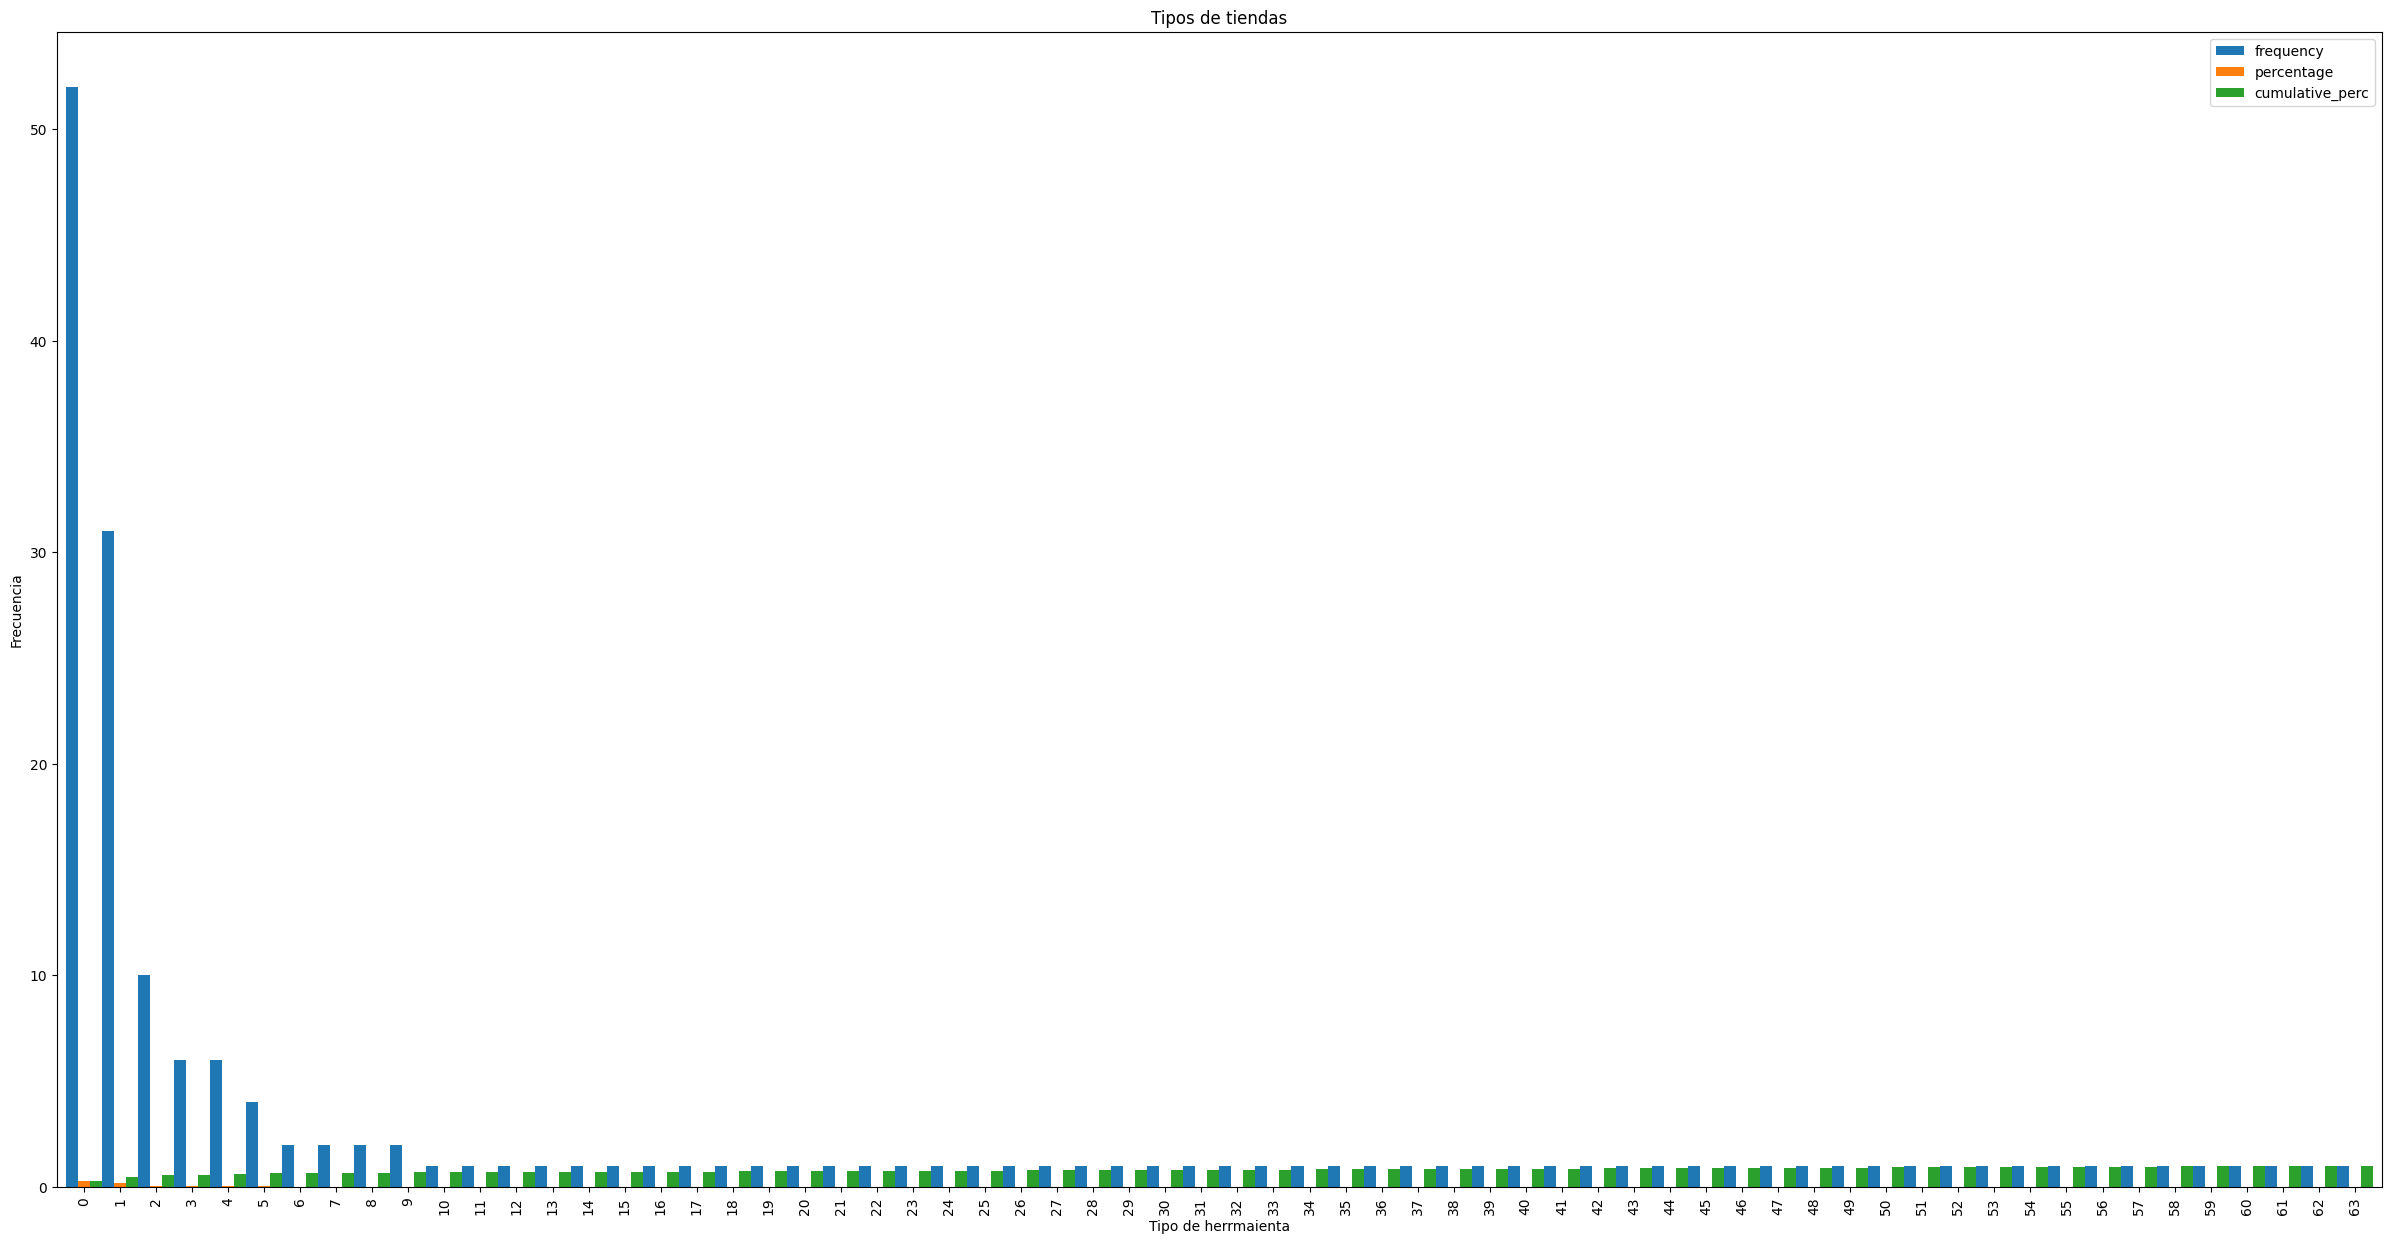

In [75]:
t2.plot(kind='bar',width=1, figsize=(30,15))
plt.title('Tipos de tiendas')
plt.xlabel('Tipo de herrmaienta')
plt.ylabel('Frecuencia')

In [77]:
t3=freq_tbl(limpia['does_the_micro_retailer_exhibits_products_outside_'])
t3

,does_the_micro_retailer_exhibits_products_outside_,frequency,percentage,cumulative_perc
0,no,120,0.701754,0.701754
1,yes,51,0.298246,1.000000


<Axes: ylabel='frequency'>

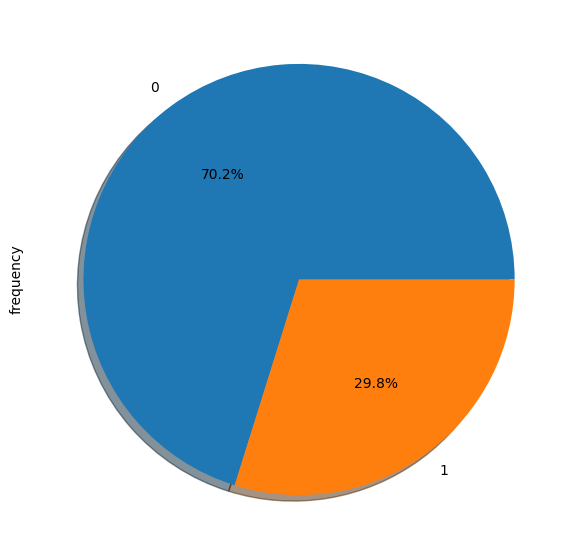

In [78]:
t3['frequency'].plot(kind='pie', figsize=(14,7),shadow=True, autopct="%0.1f%%")

In [79]:
t4=freq_tbl(limpia['store_devices'])
t4

,store_devices,frequency,percentage,cumulative_perc
0,Smartphone,54,0.315789,0.315789
1,Analog cash register,16,0.093567,0.409357
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.461988
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.514620
4,"Analog cash register,Smartphone",8,0.046784,0.561404
5,"Security cameras,Smartphone",7,0.040936,0.602339
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.631579
7,Security cameras,5,0.029240,0.660819
8,Dataphone (i.e. card payments),4,0.023392,0.684211
9,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.707602


Text(0, 0.5, 'Frecuencia')

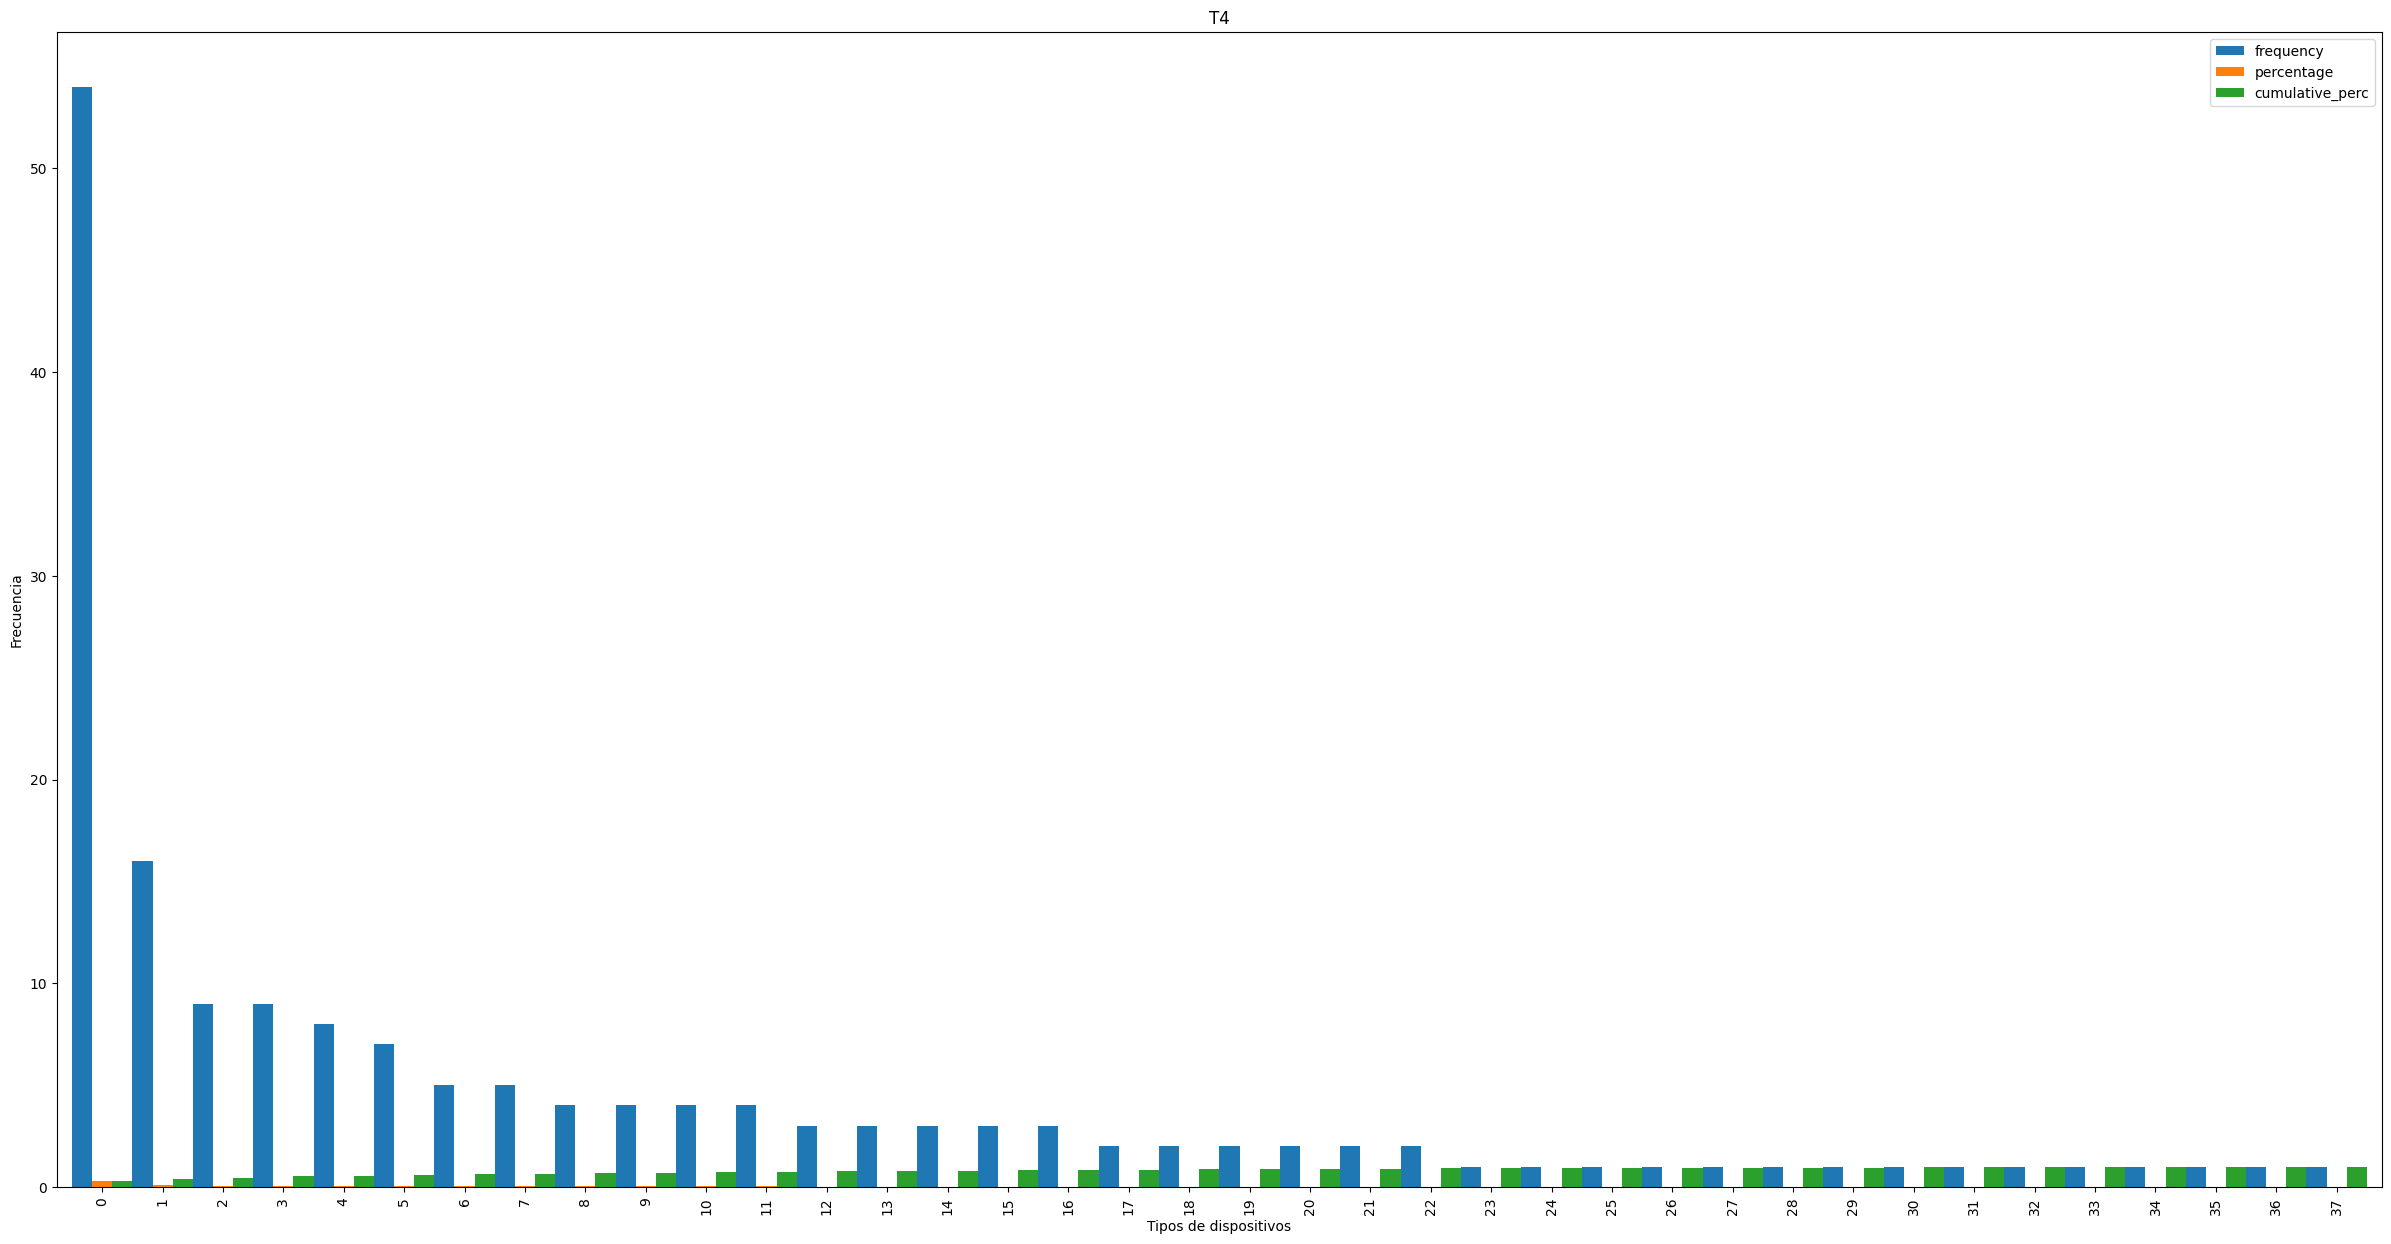

In [80]:
t4.plot(kind='bar',width=1, figsize=(30,15))
plt.title('T4')
plt.xlabel('Tipos de dispositivos')
plt.ylabel('Frecuencia')

In [81]:
t5=freq_tbl(limpia['inventory_records'])
t5

,inventory_records,frequency,percentage,cumulative_perc
0,En papel,101,0.590643,0.590643
1,Software especializado + computadora,21,0.122807,0.713450
2,En Excel,20,0.116959,0.830409
3,No lo hago,18,0.105263,0.935673
4,"En Excel,En papel",7,0.040936,0.976608
5,Mentalmente,1,0.005848,0.982456
6,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.988304
7,"En papel,Mental",1,0.005848,0.994152
8,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


Text(0, 0.5, 'Frecuencia')

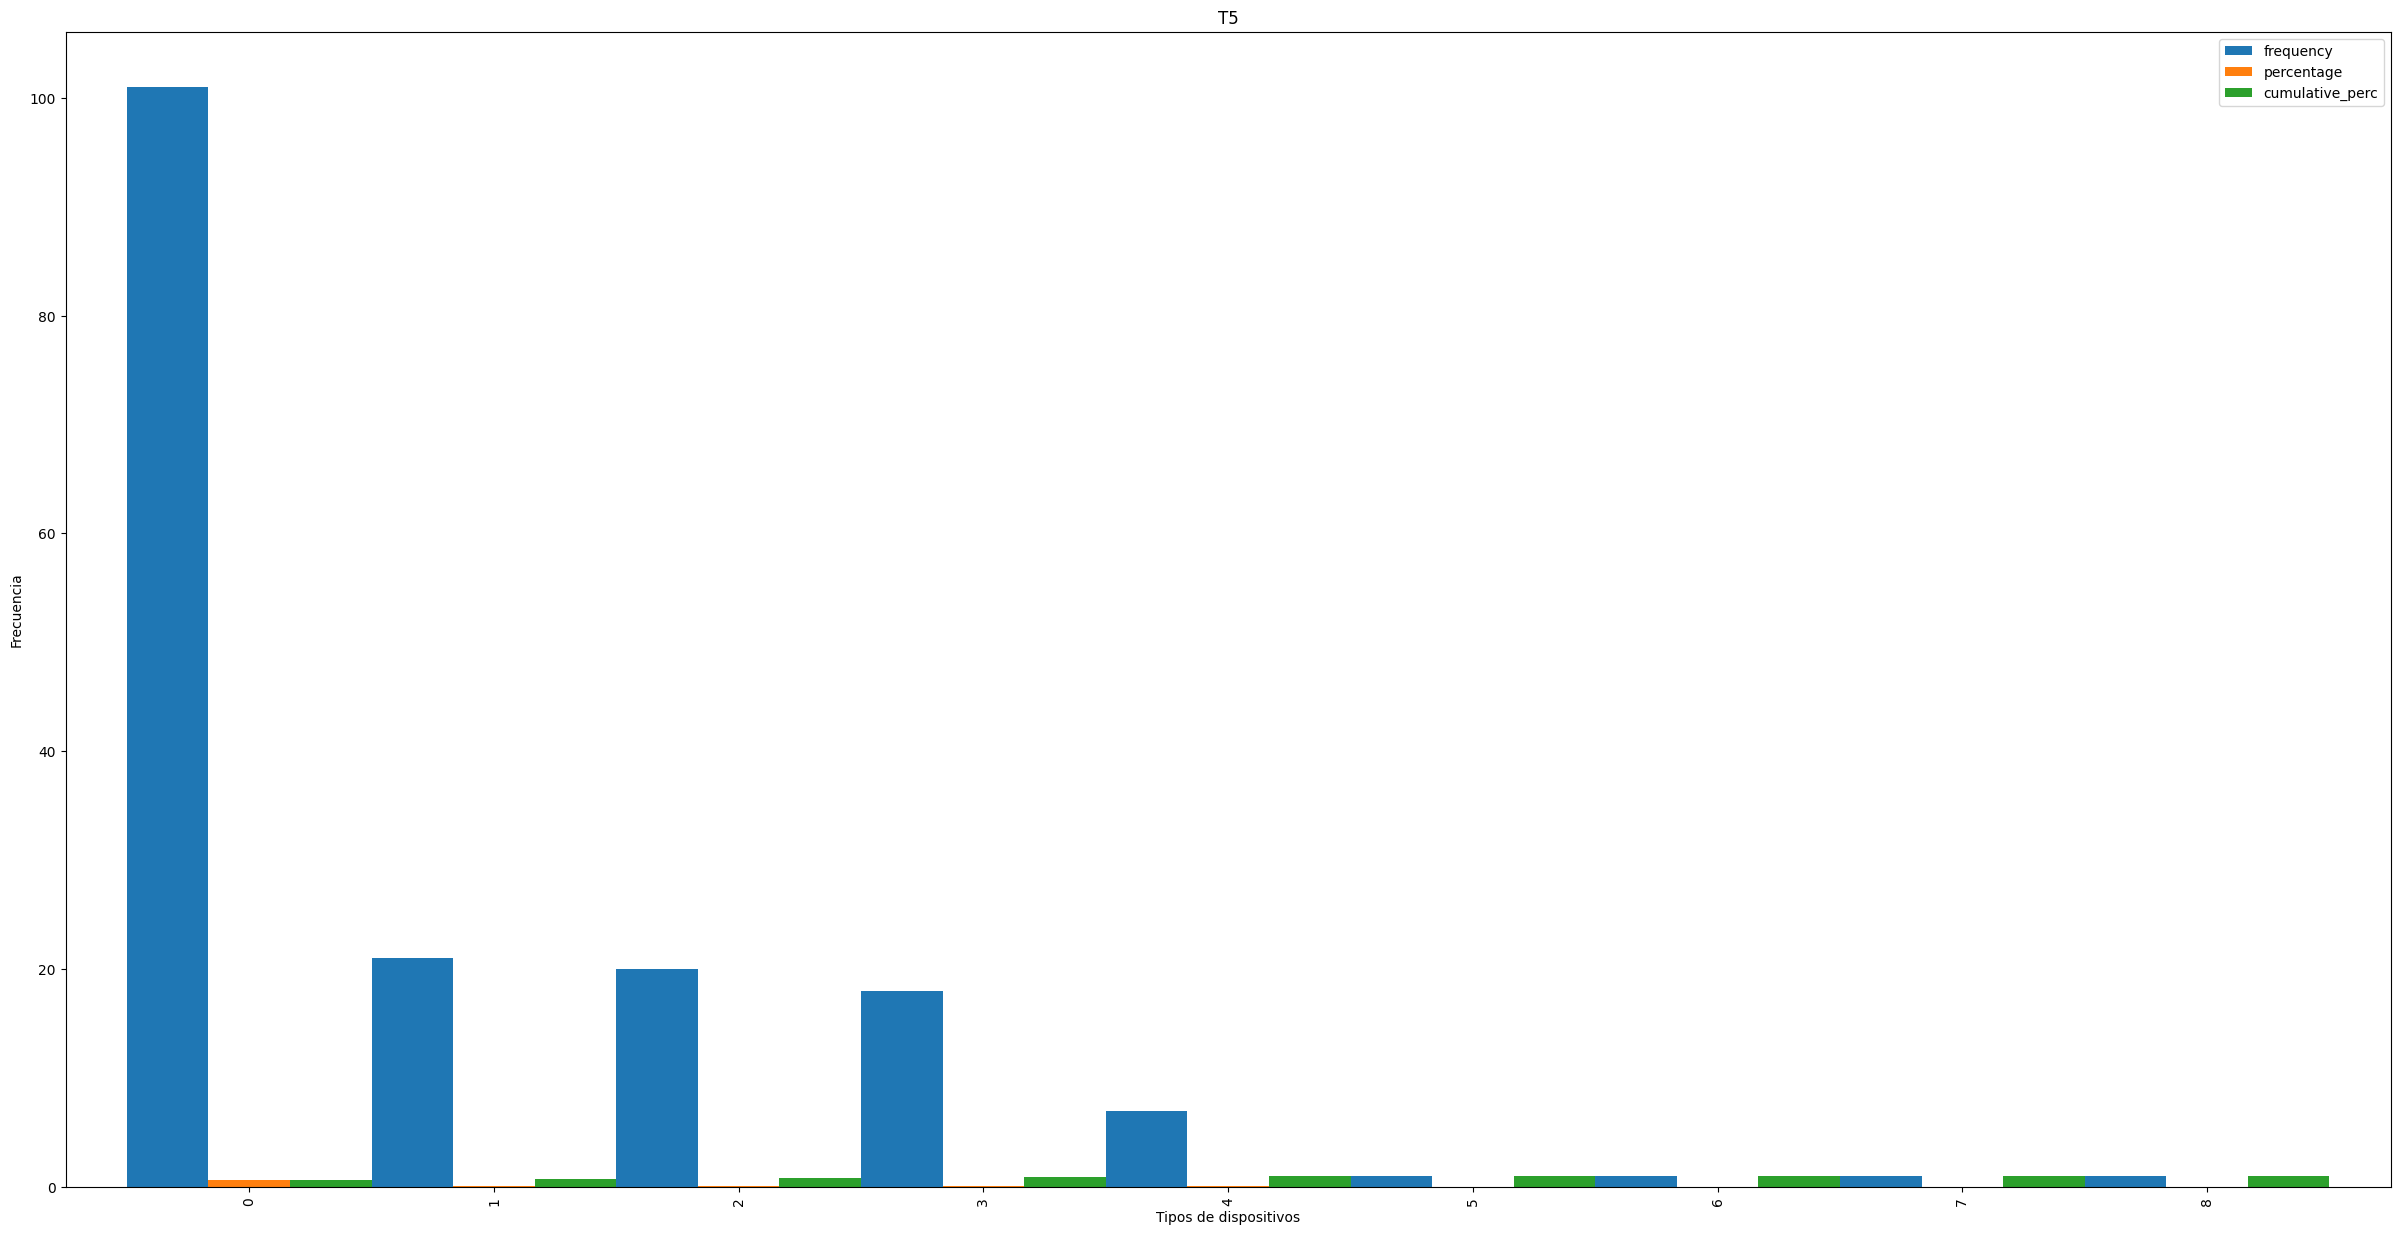

In [82]:
t5.plot(kind='bar',width=1, figsize=(30,15))
plt.title('T5')
plt.xlabel('Tipos de dispositivos')
plt.ylabel('Frecuencia')

In [87]:
t6=freq_tbl(limpia['sales_records'])
t6

,sales_records,frequency,percentage,cumulative_perc
0,En papel,108,0.631579,0.631579
1,Software especializado + computadora,22,0.128655,0.760234
2,No lo hago,14,0.081871,0.842105
3,En Excel,10,0.058480,0.900585
4,Caja registradora (análoga),4,0.023392,0.923977
5,"En Excel,En papel",4,0.023392,0.947368
6,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.953216
7,"Aplicación móvil (i.e. App) + smartphone,Caja ...",1,0.005848,0.959064
8,Contadora,1,0.005848,0.964912
9,Notas,1,0.005848,0.970760


In [88]:
t7=freq_tbl(limpia['sales_channels'])
t7

,sales_channels,frequency,percentage,cumulative_perc
0,"Redes sociales (e.g. Facebook, Instagram)",100,0.584795,0.584795
1,WhatsApp,10,0.058480,0.643275
2,"Redes sociales (e.g. Facebook, Instagram),What...",9,0.052632,0.695906
3,Llamada a Teléfono fijo,6,0.035088,0.730994
4,"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082
5,Llamada a Teléfono celular,5,0.029240,0.795322
6,"Llamada a Teléfono celular,Redes sociales (e.g...",5,0.029240,0.824561
7,"Llamada a Teléfono celular,Llamada a Teléfono ...",3,0.017544,0.842105
8,Ninguno,3,0.017544,0.859649
9,Página web propia,3,0.017544,0.877193


In [89]:
t8=freq_tbl(limpia['payment_methods'])
t8

,payment_methods,frequency,percentage,cumulative_perc
0,Efectivo,104,0.608187,0.608187
1,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.783626
2,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
3,"Efectivo,Transferencia interbancaria",15,0.087719,0.982456
4,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.988304
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.994152
6,Tarjeta de débito y/o crédito,1,0.005848,1.000000


In [90]:
t9=freq_tbl(limpia['sales_planning_tools'])
t9

,sales_planning_tools,frequency,percentage,cumulative_perc
0,Ninguna,122,0.713450,0.713450
1,Cuaderno,21,0.122807,0.836257
2,Software especializado,6,0.035088,0.871345
3,Excel,6,0.035088,0.906433
4,"Cuaderno,Excel",3,0.017544,0.923977
5,"Cuaderno,Ninguna",2,0.011696,0.935673
6,Other,1,0.005848,0.941520
7,Mental,1,0.005848,0.947368
8,Por temporada de pan,1,0.005848,0.953216
9,Sobre demanda,1,0.005848,0.959064


In [91]:
t10=freq_tbl(limpia['services'])
t10

,services,frequency,percentage,cumulative_perc
0,Ninguno,138,0.807018,0.807018
1,Entrega a domicilio,15,0.087719,0.894737
2,Recarga telefónica,7,0.040936,0.935673
3,"Entrega a domicilio,Pago de servicios públicos...",2,0.011696,0.947368
4,"Entrega a domicilio,Recarga telefónica",2,0.011696,0.959064
5,Toma de papa nicolau,1,0.005848,0.964912
6,Renta de local,1,0.005848,0.970760
7,venta,1,0.005848,0.976608
8,"Entrega a domicilio,Recarga telefónica,Recepci...",1,0.005848,0.982456
9,"Entrega a domicilio,Pago de servicios públicos...",1,0.005848,0.988304


In [92]:
t11=freq_tbl(limpia['credit_to_customers'])
t11

,credit_to_customers,frequency,percentage,cumulative_perc
0,no,144,0.842105,0.842105
1,yes,27,0.157895,1.000000


In [93]:
t12=freq_tbl(limpia['home_deliveries'])
t12

,home_deliveries,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,138,0.807018,0.807018
1,Totalmente de acuerdo,14,0.081871,0.888889
2,Algo de acuerdo,11,0.064327,0.953216
3,Algo en desacuerdo,5,0.029240,0.982456
4,Ni de acuerdo ni en desacuerdo,3,0.017544,1.000000


In [94]:
t13=freq_tbl(limpia['reception_delivery_packages'])
t13

,reception_delivery_packages,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,149,0.871345,0.871345
1,Algo de acuerdo,9,0.052632,0.923977
2,Totalmente de acuerdo,8,0.046784,0.970760
3,Ni de acuerdo ni en desacuerdo,3,0.017544,0.988304
4,Algo en desacuerdo,2,0.011696,1.000000


In [95]:
t14=freq_tbl(limpia['place_orders_suppliers'])
t14

,place_orders_suppliers,frequency,percentage,cumulative_perc
0,En persona,120,0.701754,0.701754
1,Mensajería instantánea (e.g. WhatsApp),8,0.046784,0.748538
2,"En persona,Llamada telefónica,Mensajería insta...",7,0.040936,0.789474
3,Llamada telefónica,6,0.035088,0.824561
4,"En persona,Mensajería instantánea (e.g. WhatsApp)",5,0.029240,0.853801
5,Página web del proveedor,5,0.029240,0.883041
6,"En persona,Llamada telefónica",5,0.029240,0.912281
7,"Mensaje de texto (SMS),Mensajería instantánea ...",2,0.011696,0.923977
8,"En persona,Página web del proveedor",2,0.011696,0.935673
9,Mensaje de texto (SMS),2,0.011696,0.947368


In [96]:
t15=freq_tbl(limpia['willingness_inventory_management_suppliers'])
t15

,willingness_inventory_management_suppliers,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,150,0.877193,0.877193
1,Algo en desacuerdo,8,0.046784,0.923977
2,Ni de acuerdo ni en desacuerdo,5,0.029240,0.953216
3,Algo de acuerdo,5,0.029240,0.982456
4,Totalmente de acuerdo,3,0.017544,1.000000


In [97]:
t16=freq_tbl(limpia['internet_connection'])
t16

,internet_connection,frequency,percentage,cumulative_perc
0,yes,139,0.812865,0.812865
1,no,32,0.187135,1.000000


In [98]:
t17=freq_tbl(limpia['technology_investment_customer_preferences'])
t17

,technology_investment_customer_preferences,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,114,0.666667,0.666667
1,Totalmente de acuerdo,29,0.169591,0.836257
2,De acuerdo,24,0.140351,0.976608
3,En desacuerdo,2,0.011696,0.988304
4,Ni de acuerdo ni en desacuerdo,2,0.011696,1.000000


Como podemos observar donde la mayoría de tiendas no venden productos frescos, y la mayoría son tiendas de comestibles, la mayoría de las tiendas no exhiben sus productos, el dispositivo más común dentro de las tiendas es el Smartphone, la mayoría lleva su registro de ventas en papel, la mayoría vende por redes sociales como es Facebook o Instagram, sin embargo todo se paga en efectivo, es relevante destacar que gran parte de los registros no cuenta con herramientas para planear sus ventas y no cuentan con servicios como por ejemplo servicio de delivery o la recepción de paquete y tampoco le dan crédito a sus clientes. Ordenan en eprsona a sus proveedores, no cuentas con otros medios ni con disposición del manejo de inventario de sus proveedores, así como tampoco cuentan con alguna investigación sobre la preferencia de sus clientes.

Al obtener esta base de datos podría intuir que se hablan de PYMES, por lo que les falta un poco de visión, pues creo que es importante que conozcan a sus clientes, ya que la personalización es una megatendencia, asimismo es importante que vayan adecuandose al avance tecnológico, pues muchas cosas importantes las llevan de una manera un tanto antigua, deben de quitar esos limites y ampliar sus opciones para facilitar el consumo a sus clientes.
